Importando as dependências.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Coletando e processando os dados.

In [2]:
car_dataset = pd.read_csv('car data.csv')

In [5]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_dataset.shape #Número de linhas e colunas, respectivamente

(301, 9)

In [8]:
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [9]:
car_dataset.isnull().sum() #Verifica se há valores nulos (o 0 indica que não há valores nulos).

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts()) 
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Transformando os dados categóricos.

In [12]:
car_dataset.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer': 0, 'Individual':1}}, inplace=True)
car_dataset.replace({'Transmission':{'Manual': 0, 'Automatic':1}}, inplace=True)
#Substitui os valores categóricos por valores numéricos, facilitando a análise.

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Dividindo os dados em Teste e Treino.

In [13]:
x = car_dataset.drop({'Car_Name', 'Selling_Price'}, axis=1)
y = car_dataset['Selling_Price']

In [14]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=2)

Treinando o modelo.
## Regressão Linear

In [17]:
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Avaliando o modelo


In [19]:
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8799451660493708


Visualizando o preço real e o preço previsto.

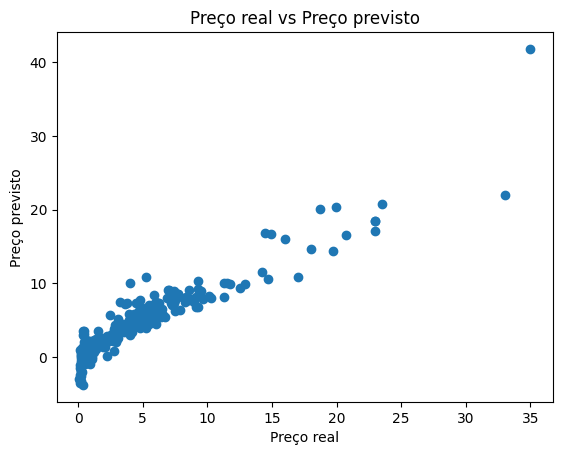

In [21]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Preço real')
plt.ylabel('Preço previsto')
plt.title('Preço real vs Preço previsto')
plt.show()

In [23]:
test_data_prediction = lin_reg_model.predict(X_test)

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)    
print('R squared Error:', error_score)

R squared Error: 0.8365766715026374


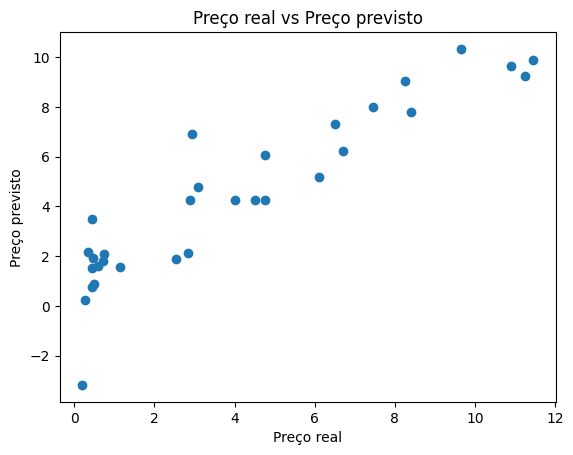

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Preço real')
plt.ylabel('Preço previsto')
plt.title('Preço real vs Preço previsto')
plt.show()

## Regressão de Lasso

In [26]:
lass_reg_model = Lasso()


In [27]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Avaliando o modelo


In [28]:
training_data_prediction = lass_reg_model.predict(X_train)

In [29]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8427856123435794


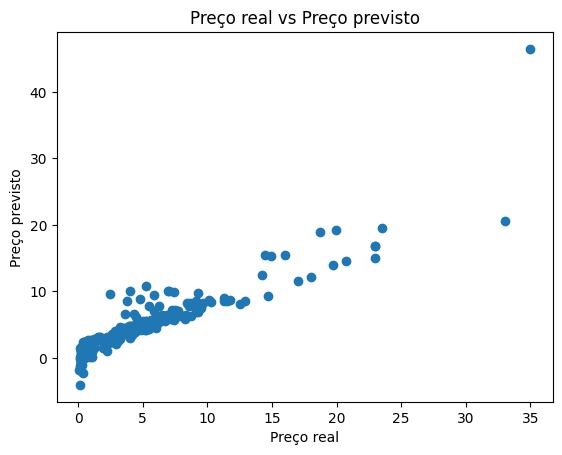

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Preço real')
plt.ylabel('Preço previsto')
plt.title('Preço real vs Preço previsto')
plt.show()

In [31]:
test_data_prediction = lass_reg_model.predict(X_test)

In [32]:
error_score = metrics.r2_score(Y_test, test_data_prediction)    
print('R squared Error:', error_score)

R squared Error: 0.8709167941173195


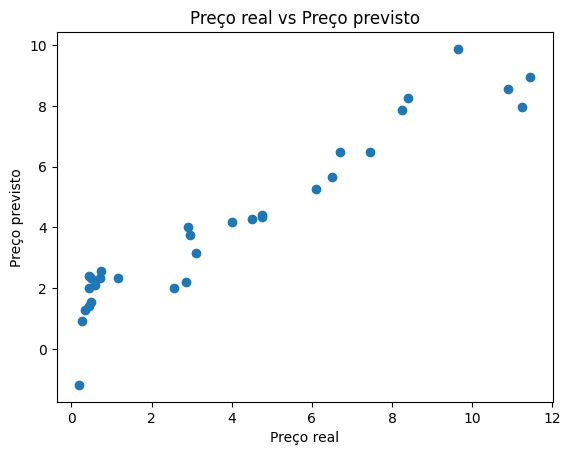

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Preço real')
plt.ylabel('Preço previsto')
plt.title('Preço real vs Preço previsto')
plt.show()